### IMPORTING DATASET USING SQL CONNECTOR

In [1]:
import mysql.connector
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

try:
    mydb = mysql.connector.connect(
        host="18.136.157.135",
        user="dm_team2",
        password="DM!$Team&27@9!20!",
        database="project_sales"
    )
    query = "SELECT * FROM data;"
    result_dataFrame = pd.read_sql(query, mydb)
except mysql.connector.Error as err:
    print("Error: {}".format(err))

In [2]:
# converting the file into .csv
result_dataFrame.to_csv('data.csv')

In [3]:
# importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('data.csv')

# Print the first few rows of the dataset
data.head()


,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


### BASIC CHECKS

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7422 non-null   int64  
 1   Created        7422 non-null   object 
 2   Product_ID     7364 non-null   float64
 3   Source         7405 non-null   object 
 4   Mobile         5612 non-null   object 
 5   EMAIL          7422 non-null   object 
 6   Sales_Agent    7399 non-null   object 
 7   Location       7364 non-null   object 
 8   Delivery_Mode  7422 non-null   object 
 9   Status         7422 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 580.0+ KB


In [5]:
# description of data including object column
data.describe(include='O')

,Created,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7405,5612,7422,7399,7364,7422,7422
unique,6752,25,486,883,12,17,5,11
top,26-09-2018 11:30,Call,XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,2547,222,1701,1500,2500,2975,1536


## EXPLOTARY DATA ANALYSIS

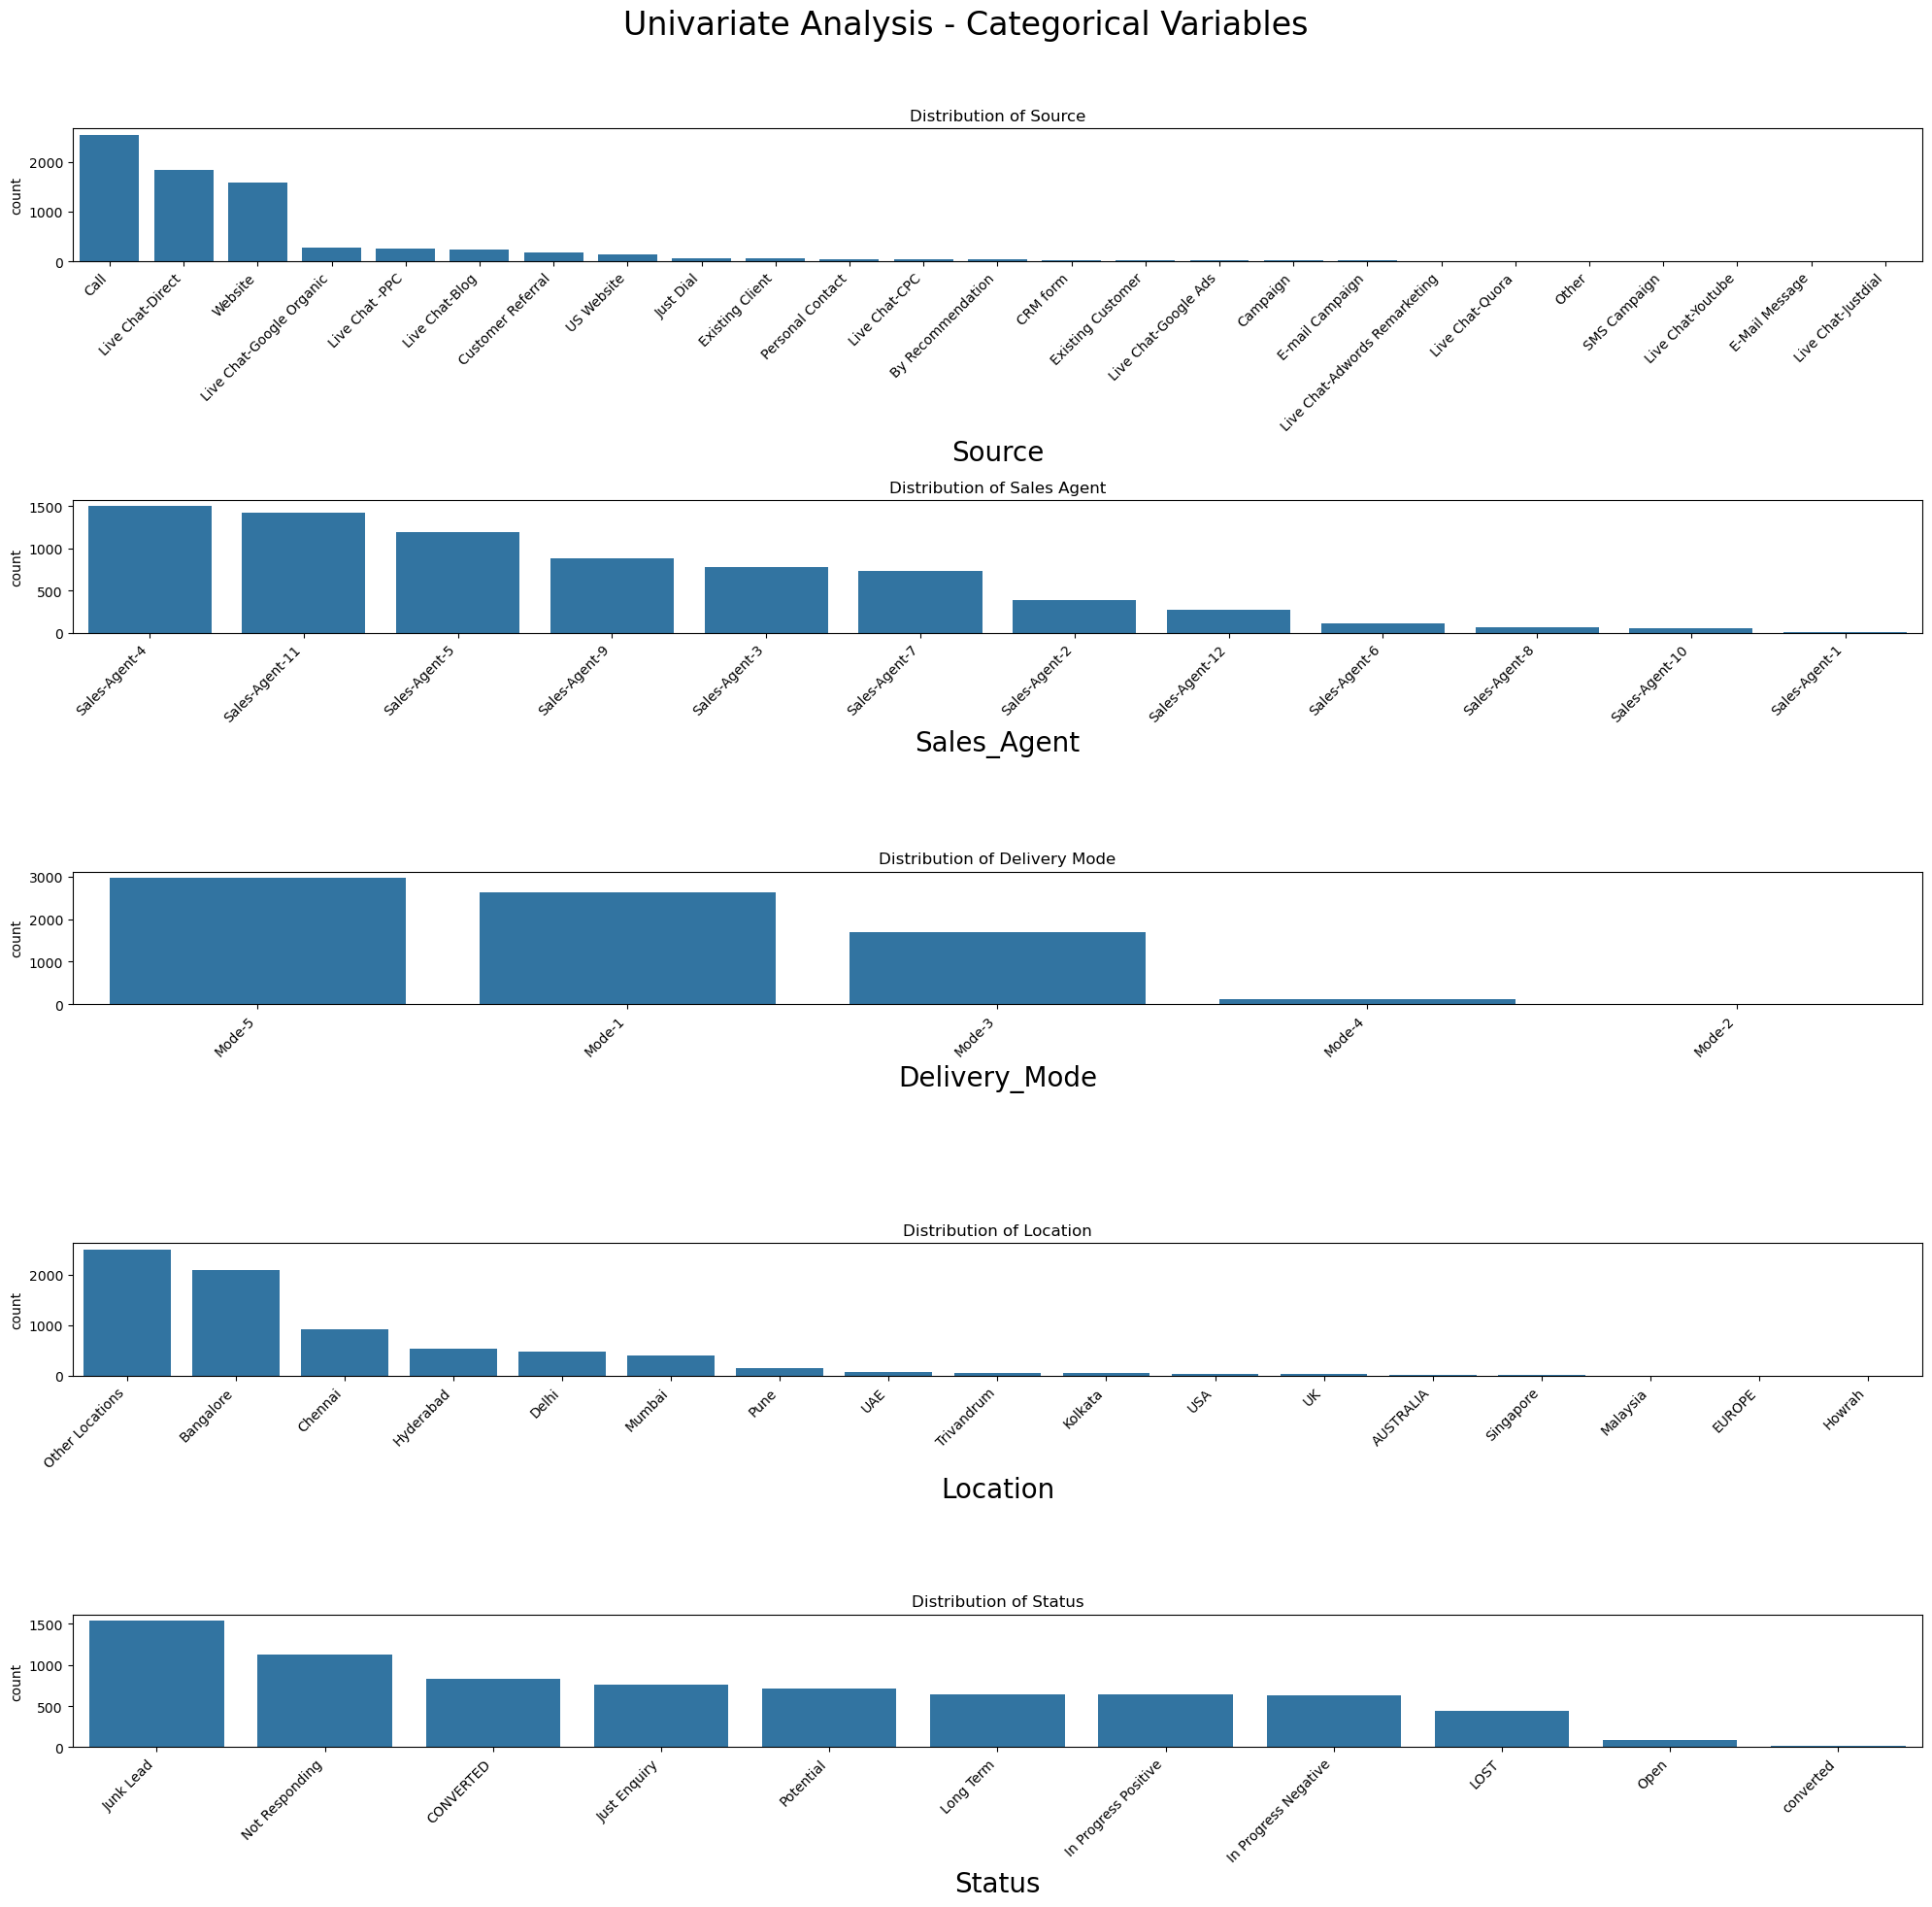

In [6]:
# Categorical Variables
fig, axes = plt.subplots(5,1, figsize=(20, 20))
fig.suptitle('Univariate Analysis - Categorical Variables', fontsize=24)

variables = ['Source', 'Sales_Agent', 'Delivery_Mode','Location', 'Status']
titles = ['Distribution of Source', 'Distribution of Sales Agent', 'Distribution of Delivery Mode','Distribution of Location', 'Distribution of Status']

for i, ax in enumerate(axes.flatten()):
    sns.countplot(x=variables[i], data=data, order=data[variables[i]].value_counts().index, ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel(variables[i], fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for the title
plt.show()

->Sources: Call centers dominate with 2,547 entries, followed by Live Chat-Direct (1,834)

->Sales Agents: Two agents (4 and 11) handle 39% of all order
s
->Delivery Modes: Highly concentrated in Mode-5 (2,975) and Mode-1 (2,627)

->Locations: Concentrated in major cities (Bangalore: 2,084, Chennai: 909)

->Status: Junk Lead (1,536) and Not Responding (1,129) are most common, with CONVERTED at 834

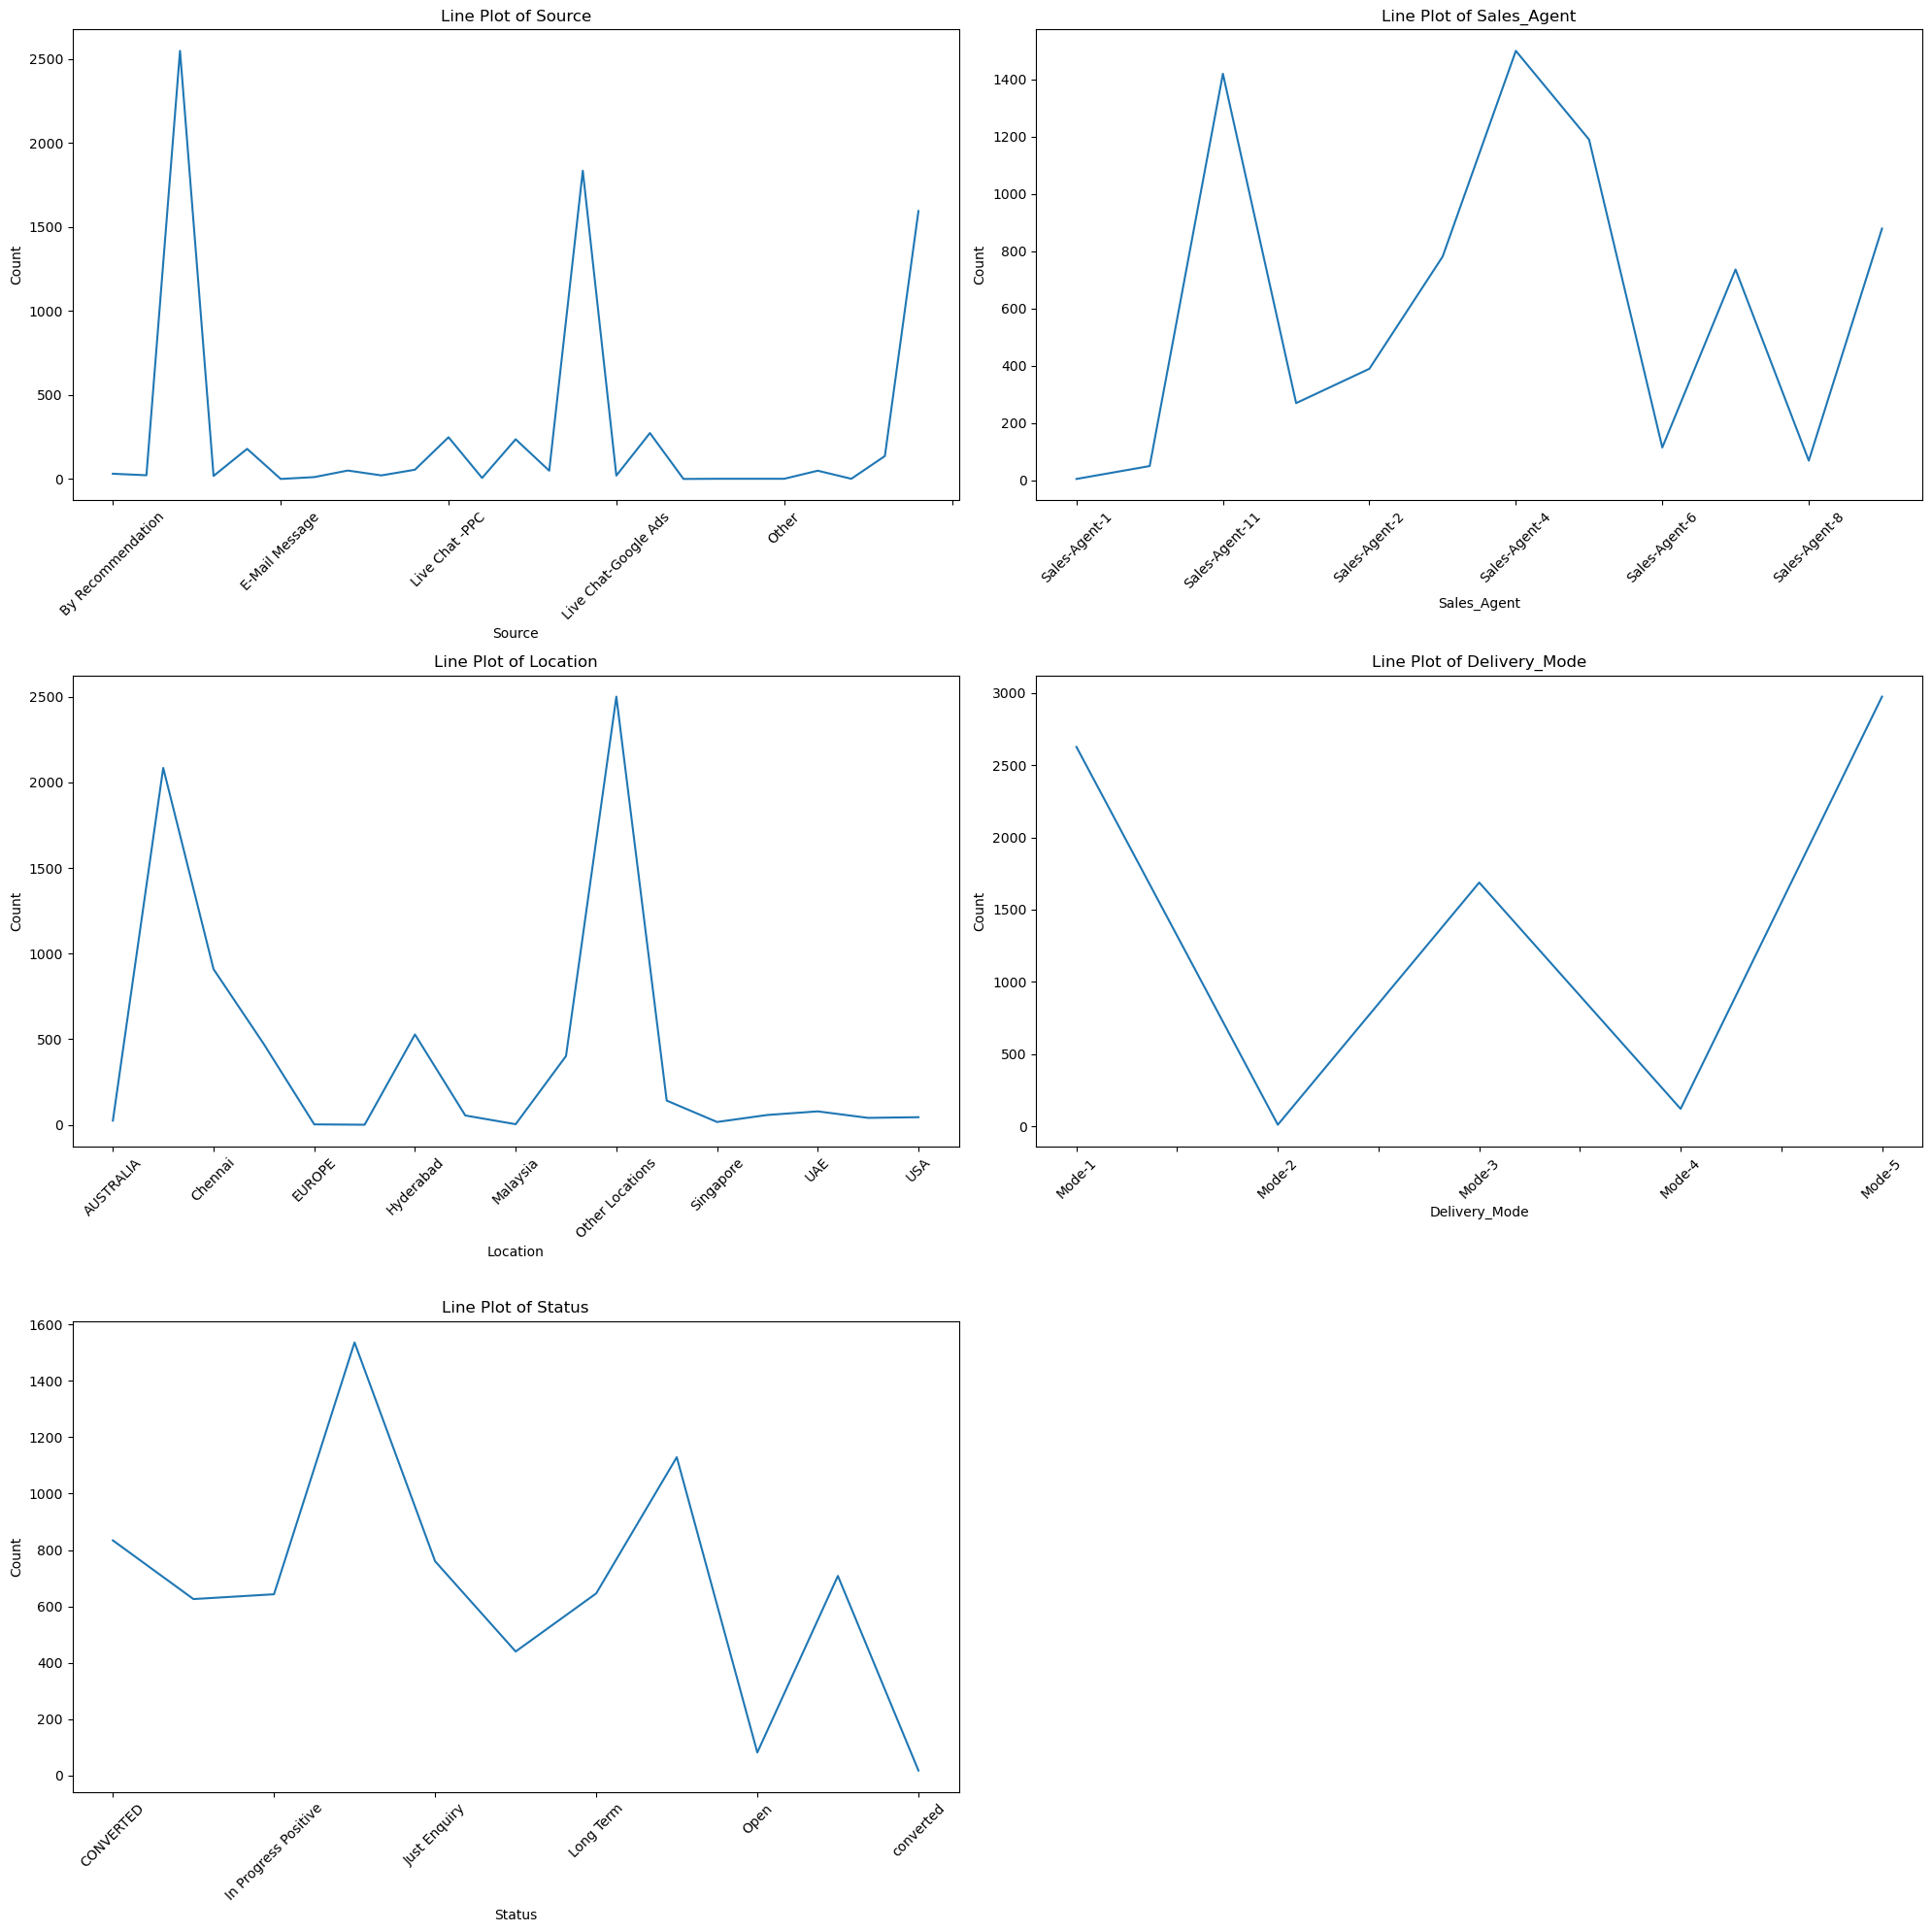

In [7]:
# Line plots for categorical columns
columns_to_plot = ['Source', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status']
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
axes = axes.flatten()  # Flatten the axes array for easier indexing
for i, col in enumerate(columns_to_plot):
    data[col].value_counts().sort_index().plot(kind='line', ax=axes[i])
    axes[i].set_title(f'Line Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
# Hide any unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


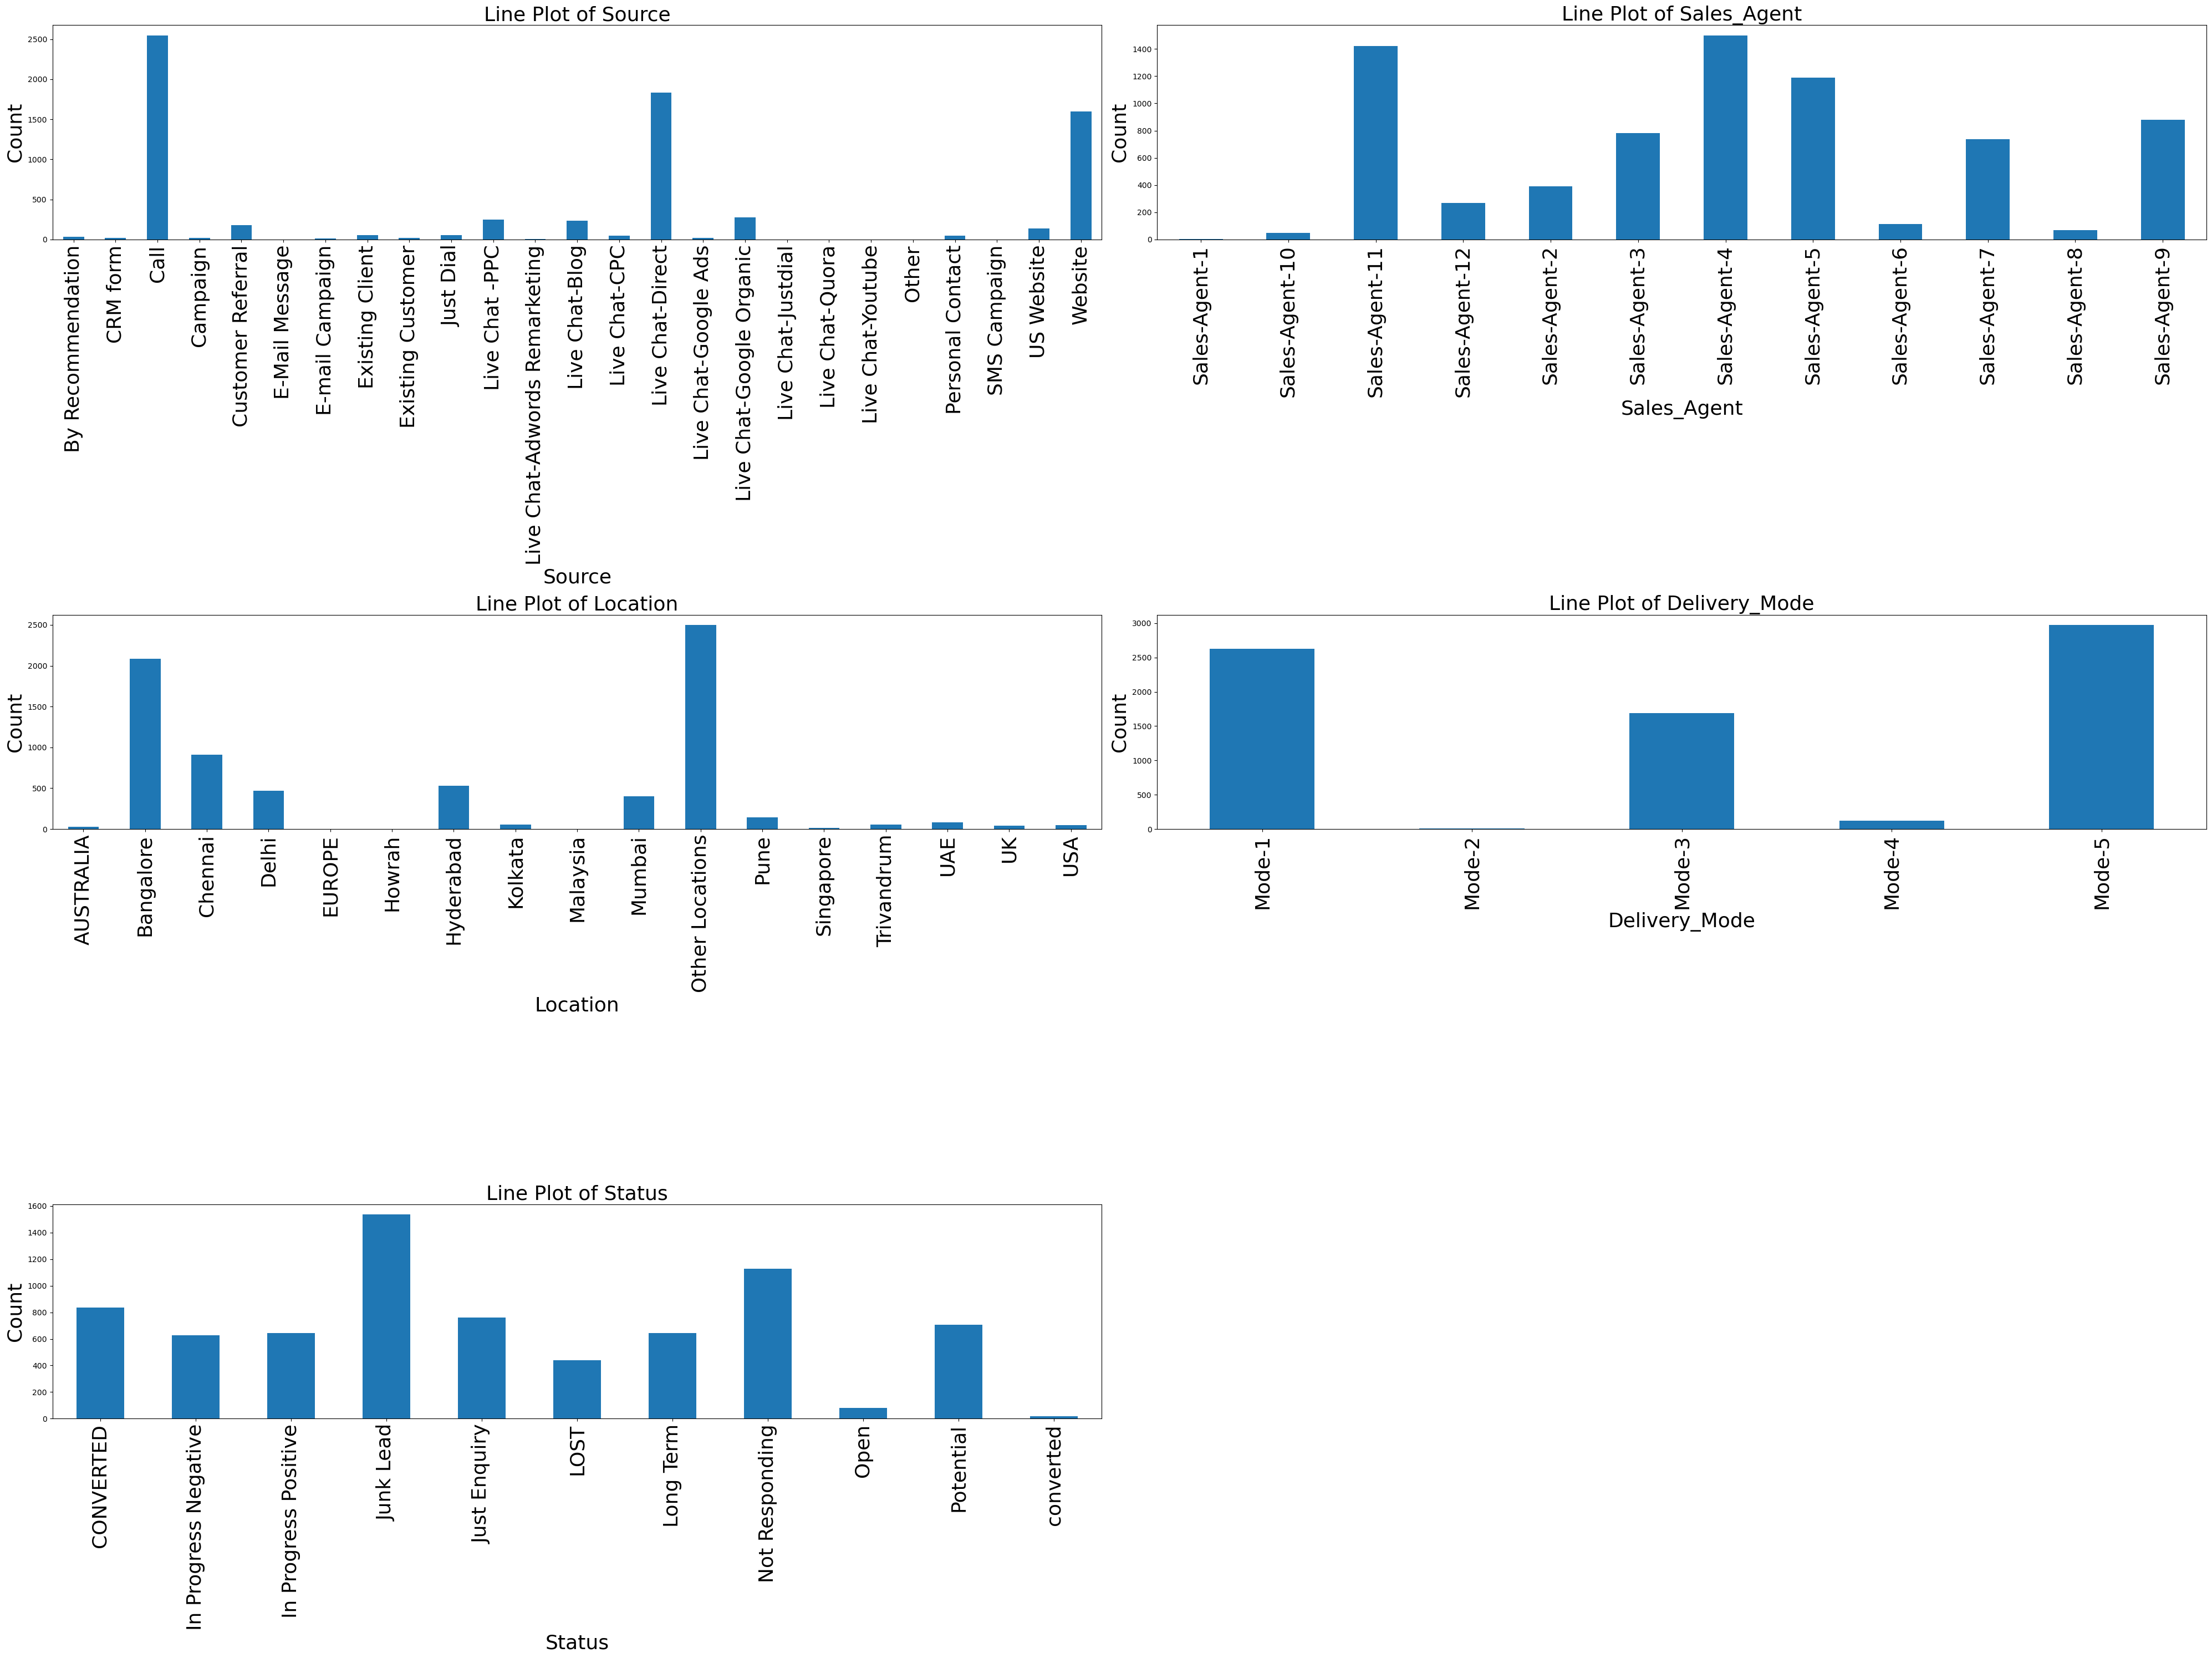

In [8]:
# bar plot for categorical columns
columns_to_plot = ['Source', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status']
fig, axes = plt.subplots(3, 2, figsize=(40, 30))
axes = axes.flatten()  # Flatten the axes array for easier indexing
for i, col in enumerate(columns_to_plot):
    data[col].value_counts().sort_index().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Line Plot of {col}', fontsize=26)  # Increase title font size
    axes[i].set_xlabel(col, fontsize=26)  # Increase x-axis label font size
    axes[i].set_ylabel('Count', fontsize=26)  # Increase y-axis label font size
    axes[i].tick_params(axis='x', rotation=90, labelsize=26)  # Increase x-axis tick label size
# Hide any unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


->Call centers (34.32%) and Live Chat-Direct (24.71%) are the dominant order sources

->Sales-Agent-4 and Sales-Agent-11 handle the highest volume of orders (1500 and 1420 respectively)

->Chennai leads locations with 909 orders, followed by Hyderabad (528) and Delhi (471)

->Mode-5 (40.08%) and Mode-1 (35.39%) are the preferred delivery methods

->Order status breakdown shows Junk Lead (20.7%) and Not Responding (15.21%) as top categories, with CONVERTED at 11.24%

<Figure size 6000x6000 with 0 Axes>

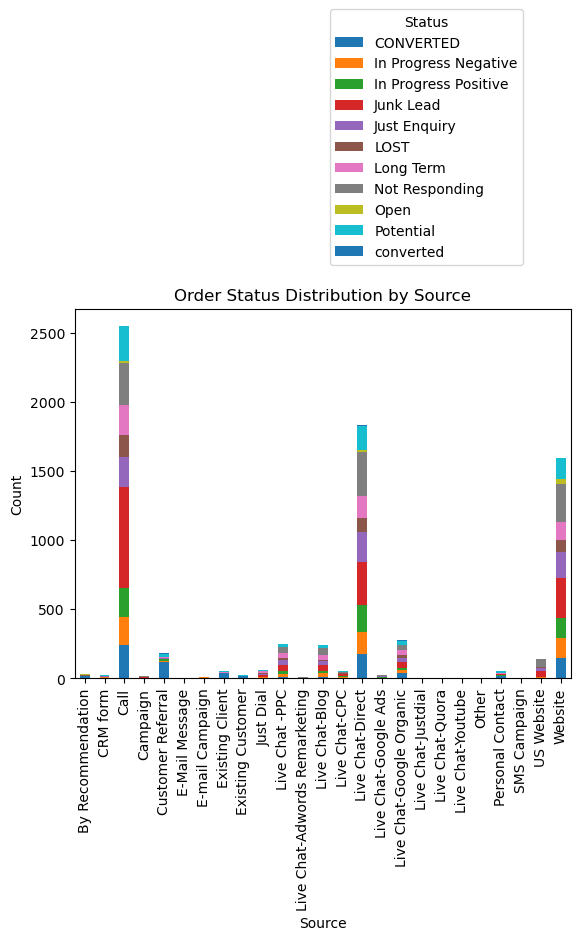

In [9]:
# distribution of orders stacked by status
plt.figure(figsize=(60, 60))
status_by_source = pd.crosstab(data['Source'], data['Status'])
status_by_source.plot(kind='bar', stacked=True)
plt.title('Order Status Distribution by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.legend(title='Status', bbox_to_anchor=(0.5, 1.10))
plt.tight_layout()
plt.show()

->The highest number of orders 2500 came from "call". This suggests "call" is a highly effective source.

->The next highest sources are "website" around 1400 and "live chat direct" around 1700. This indicates these are also impactful sources.

->The number of orders from sources like "Other", "Email" is very low, indicating that these sources may not be significant.

### DATA PREPROCESSING/FEATURE ENGINEERING

In [10]:
# checking null values
data.isnull().sum()

Unnamed: 0          0
Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

### 1.) FILLING NULL VALUE USING MODE 

In [11]:
columns = ['Product_ID', 'Source', 'Sales_Agent', 'Location']

for column in columns:
    mode_value = data[column].mode()[0]
    print(f"Mode for {column}: {mode_value}")

Mode for Product_ID: 18.0
Mode for Source: Call
Mode for Sales_Agent: Sales-Agent-4
Mode for Location: Other Locations


In [12]:
# imputing null values with mode because of categorical feature
columns = ['Product_ID', 'Source', 'Sales_Agent', 'Delivery_Mode', 'Location']

for column in columns:
    mode_value = data[column].mode()[0]
    data.loc[data[column].isnull()==True, column] = mode_value

In [13]:
# Checking missing value after imputation
data.isnull().sum()

Unnamed: 0          0
Created             0
Product_ID          0
Source              0
Mobile           1810
EMAIL               0
Sales_Agent         0
Location            0
Delivery_Mode       0
Status              0
dtype: int64

### 2.) FEATURES IS CONTAIN LOTS OF DIFFERENT LABEL SO WE COMPRESSES AND MERGED THE LABEL

#### 1) PRODUCT

In [14]:
# In this feature 13 product id has been sold minimum so we can replace into minimum sold product
data.Product_ID.replace(['11','22','3','17','6','8','13','24','16','23','0','28','7','4'],'minimum sold',inplace=True)

#### 2) SOURCE

In [15]:
# This feature is contain 25 label 
# so we make groups and put similar labels in one group like [(Live ChatDirect,Live ChatGoogle Organic,Live Chat PPC)--> live chats]
# 1st group ---- Live chat
data.Source.replace(['Live Chat-Google Organic' ,'Live Chat-Direct','Live Chat-Blog', 'Live Chat -PPC',
 'Live Chat-Google Ads', 'Live Chat-Adwords Remarketing','Live Chat-CPC','Live Chat-Quora','Live Chat-Youtube',
 'Live Chat-Justdial'],'live chat',inplace=True)
# 2nd group ---- new client
data.Source.replace(['Existing Client','Existing Customer','CRM form','Personal Contact'],'new client',inplace=True)
# 3rd group --- website
data.Source.replace(['US Website', 'Just Dial'],'social',inplace=True)
# 4th group --- recommendation
data.Source.replace(['By Recommendation', 'Customer Referral'],'recommendation',inplace=True)
# 5th group ---- campign
data.Source.replace(['Campaign', 'E-mail Campaign', 'SMS Campaign','E-Mail Message'],'campaign',inplace=True)

#### 3) LOCATION

In [16]:
# combining different location according to their region
# 1st group
data.Location.replace(['Trivandrum','Kolkata','Howrah'],'Other Locations',inplace=True)

# 2nd group
data.Location.replace(['UAE','Malaysia','Singapore'],'asia',inplace=True)

# 3rd group 
data.Location.replace(['USA','UK','AUSTRALIA','EUROPE'],'west country',inplace=True)

In [17]:
data.Location.value_counts()

Location
Other Locations    2672
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
west country        114
asia                100
Name: count, dtype: int64

#### 4) STATUS

In [18]:
#  target variables are separate as high potential, and low potential

# 1st group --- low potential
data.Status.replace(['Junk Lead','Not Responding','In Progress Negative','Just Enquiry','LOST'],'low potential',inplace=True)

# 2nd group --- high potential
data.Status.replace(['CONVERTED','Potential','Long Term','In Progress Positive','Open','converted'],'high potential',inplace=True)

### 3) CATEGORICAL DATA CONVERSION

In [19]:
# 1.Product_ID
# Assigning value  zero to minimum sold product
data.loc[data['Product_ID']=='minimum sold','Product_ID']=0

In [20]:
# 2.Source 
# frequency encoding because of maximum label and nominal data-type
data.loc[data['Source']=='live chat','Source']=7
data.loc[data['Source']=='Call','Source']=6
data.loc[data['Source']=='Website','Source']=5
data.loc[data['Source']=='recommendation','Source']=4
data.loc[data['Source']=='social','Source']=3
data.loc[data['Source']=='new client','Source']=2
data.loc[data['Source']=='campaign','Source']=1
data.loc[data['Source']=='Other','Source']=0

In [21]:
# 3.Sales Agent
data.loc[data['Sales_Agent']=='Sales-Agent-4','Sales_Agent']=11
data.loc[data['Sales_Agent']=='Sales-Agent-11','Sales_Agent']=10
data.loc[data['Sales_Agent']=='Sales-Agent-5','Sales_Agent']=9
data.loc[data['Sales_Agent']=='Sales-Agent-9','Sales_Agent']=8
data.loc[data['Sales_Agent']=='Sales-Agent-3','Sales_Agent']=7
data.loc[data['Sales_Agent']=='Sales-Agent-7','Sales_Agent']=6
data.loc[data['Sales_Agent']=='Sales-Agent-2','Sales_Agent']=5
data.loc[data['Sales_Agent']=='Sales-Agent-12','Sales_Agent']=4
data.loc[data['Sales_Agent']=='Sales-Agent-6','Sales_Agent']=3
data.loc[data['Sales_Agent']=='Sales-Agent-8','Sales_Agent']=2
data.loc[data['Sales_Agent']=='Sales-Agent-10','Sales_Agent']=1
data.loc[data['Sales_Agent']=='Sales-Agent-1','Sales_Agent']=0

In [22]:
# 4.Location 
data.loc[data['Location']=='Other Locations','Location']=8
data.loc[data['Location']=='Bangalore','Location']=7
data.loc[data['Location']=='Chennai','Location']=6
data.loc[data['Location']=='Hyderabad','Location']=5
data.loc[data['Location']=='Delhi','Location']=4
data.loc[data['Location']=='Mumbai','Location']=3
data.loc[data['Location']=='Pune','Location']=2
data.loc[data['Location']=='west country','Location']=1
data.loc[data['Location']=='asia','Location']=0

In [23]:
# 4. Delivery_Mode
data.loc[data['Delivery_Mode'] == 'Mode-5','Delivery_Mode']=4
data.loc[data['Delivery_Mode'] == 'Mode-1','Delivery_Mode']=3
data.loc[data['Delivery_Mode'] == 'Mode-3','Delivery_Mode']=2
data.loc[data['Delivery_Mode'] == 'Mode-4','Delivery_Mode']=1
data.loc[data['Delivery_Mode'] == 'Mode-2','Delivery_Mode']=0

In [24]:
# 5. Status
data.Status=data.Status.map({'high potential':1, 'low potential':0})
data.Status.unique()

array([1, 0], dtype=int64)

## FEATURE SELECTION

### 1) DROPING UNIQUE AND CONSTANT COLUMN

In [25]:
# droping unwanted column as it doesn't have imapct on the output
data.drop(['Unnamed: 0','Created','Mobile','EMAIL'],axis=1,inplace=True)

### 2) CHANGING DATA TYPE

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_ID     7422 non-null   float64
 1   Source         7422 non-null   object 
 2   Sales_Agent    7422 non-null   object 
 3   Location       7422 non-null   object 
 4   Delivery_Mode  7422 non-null   object 
 5   Status         7422 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 348.0+ KB


In [27]:
data[['Product_ID', 'Source', 'Sales_Agent', 'Location',
       'Delivery_Mode']] = data[['Product_ID', 'Source', 'Sales_Agent', 'Location',
       'Delivery_Mode']].astype(int)

### 3) SCALING THE DATA

In [28]:
from sklearn.preprocessing import StandardScaler
data1=data.drop('Status',axis=1)
# standard scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(data1)
scaled_data

array([[ 0.33655531, -0.77991223,  0.71045653,  0.8467321 ,  1.04104999],
       [ 0.33655531, -0.77991223, -3.21356161,  0.8467321 ,  1.04104999],
       [ 0.33655531, -0.77991223, -3.21356161,  0.8467321 ,  1.04104999],
       ...,
       [-1.81168998,  0.93876608,  0.71045653,  0.31550255, -0.16435922],
       [ 0.83230423, -3.35792969,  1.14645855,  0.8467321 , -0.16435922],
       [ 1.49330278, -0.77991223, -0.59754951, -0.21572701, -0.16435922]])

In [29]:
data1=pd.DataFrame(scaled_data,columns=data1.columns)
data1

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,0.336555,-0.779912,0.710457,0.846732,1.041050
1,0.336555,-0.779912,-3.213562,0.846732,1.041050
2,0.336555,-0.779912,-3.213562,0.846732,1.041050
3,0.336555,-0.779912,-3.213562,0.846732,1.041050
4,0.336555,-0.779912,-3.213562,0.846732,1.041050
...,...,...,...,...,...
7417,-1.150691,0.079427,-2.341558,-1.809416,-2.575178
7418,-0.159194,0.079427,-1.905556,0.846732,1.041050
7419,-1.811690,0.938766,0.710457,0.315503,-0.164359
7420,0.832304,-3.357930,1.146459,0.846732,-0.164359


In [30]:
data2=data.Status
data2=pd.DataFrame(data2)
data2

,Status
0,1
1,1
2,1
3,1
4,1
...,...
7417,0
7418,0
7419,0
7420,0


In [31]:
# concading data1 and data2
data=pd.concat([data1,data2],axis=1)
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0.336555,-0.779912,0.710457,0.846732,1.041050,1
1,0.336555,-0.779912,-3.213562,0.846732,1.041050,1
2,0.336555,-0.779912,-3.213562,0.846732,1.041050,1
3,0.336555,-0.779912,-3.213562,0.846732,1.041050,1
4,0.336555,-0.779912,-3.213562,0.846732,1.041050,1
...,...,...,...,...,...,...
7417,-1.150691,0.079427,-2.341558,-1.809416,-2.575178,0
7418,-0.159194,0.079427,-1.905556,0.846732,1.041050,0
7419,-1.811690,0.938766,0.710457,0.315503,-0.164359,0
7420,0.832304,-3.357930,1.146459,0.846732,-0.164359,0


### 4) CORRELATION

In [32]:
data.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,-0.007809,0.012171,-0.028204,-0.023266,0.086057
Source,-0.007809,1.000000,0.020959,-0.156931,-0.035514,-0.061368
Sales_Agent,0.012171,0.020959,1.000000,-0.114022,0.096164,-0.087726
Location,-0.028204,-0.156931,-0.114022,1.000000,0.209398,-0.080861
Delivery_Mode,-0.023266,-0.035514,0.096164,0.209398,1.000000,-0.161352
Status,0.086057,-0.061368,-0.087726,-0.080861,-0.161352,1.000000


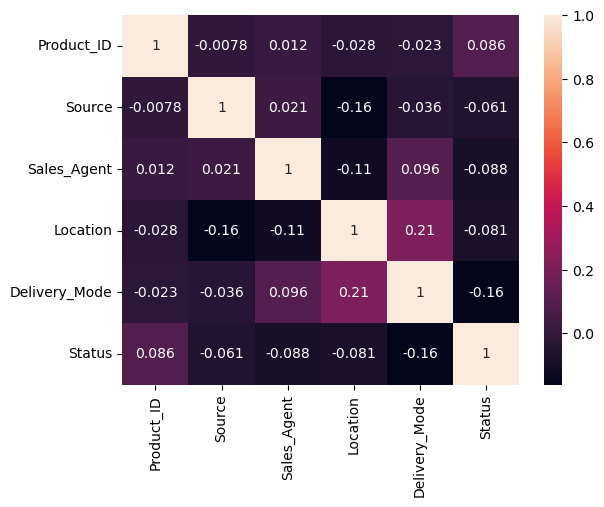

In [33]:
cor=data.corr()
sns.heatmap(cor,annot=True)
plt.show()
# columns are not highly correlated 

### SAVING DATA TO PREPROCESSING DATA

In [34]:
data.to_csv('Preprocessed_data.csv')
preprocessed_data=pd.read_csv('Preprocessed_data.csv')
preprocessed_data

,Unnamed: 0,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0,0.336555,-0.779912,0.710457,0.846732,1.041050,1
1,1,0.336555,-0.779912,-3.213562,0.846732,1.041050,1
2,2,0.336555,-0.779912,-3.213562,0.846732,1.041050,1
3,3,0.336555,-0.779912,-3.213562,0.846732,1.041050,1
4,4,0.336555,-0.779912,-3.213562,0.846732,1.041050,1
...,...,...,...,...,...,...,...
7417,7417,-1.150691,0.079427,-2.341558,-1.809416,-2.575178,0
7418,7418,-0.159194,0.079427,-1.905556,0.846732,1.041050,0
7419,7419,-1.811690,0.938766,0.710457,0.315503,-0.164359,0
7420,7420,0.832304,-3.357930,1.146459,0.846732,-0.164359,0


## MODEL CREATION

### 1) LOGISTIC REGRESSION

In [35]:
# defining dependent and independent variable
X=preprocessed_data.loc[:,['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode']]
y=preprocessed_data.Status

In [36]:
data.Status.value_counts()

Status
0    4491
1    2931
Name: count, dtype: int64

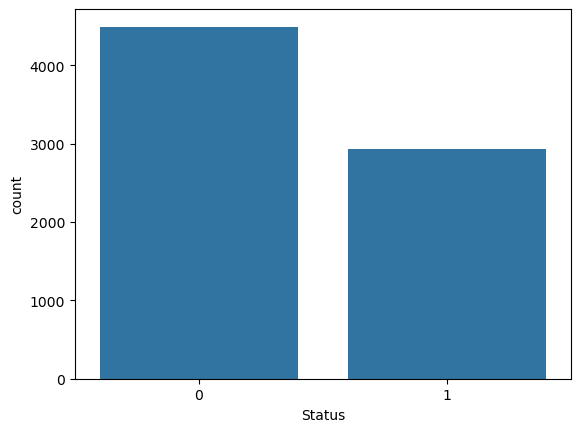

In [37]:
# Plotting the graph
sns.countplot(x='Status',data=data)
plt.show()

In [38]:
# spliting data for testing and training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)

In [39]:
# Balacing the data using smote
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
smote=SMOTE()#object creation
print(Counter(y_train))# checking count for each class
X_sm,y_sm=smote.fit_resample(X_train,y_train)#applying sampling on target variable
print(Counter(y_sm))# checking count after sampling for  each class

Counter({0: 3601, 1: 2336})
Counter({1: 3601, 0: 3601})


In [40]:
# logistic regression
from sklearn.linear_model import LogisticRegression#importing randomforest
lr=LogisticRegression()#object creation 
lr.fit(X_sm,y_sm)#training the data
y_predict=lr.predict(X_test)#prediction
y_predict#predicted values

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [41]:
# Evalauting the model for testing data
#importing mertics to check model performance
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_predict))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       0.69      0.58      0.63       890
           1       0.49      0.61      0.54       595

    accuracy                           0.59      1485
   macro avg       0.59      0.59      0.58      1485
weighted avg       0.61      0.59      0.59      1485



### HYPERPARAMETER TESTING

In [42]:
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
lr1 = LogisticRegression()

# Define the hyperparameters to tune
params = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Create the GridSearchCV object
grid = GridSearchCV(lr1, params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid.fit(X_sm,y_sm)

# Print the best hyperparameters and the corresponding accuracy score
print('Best hyperparameters:', grid.best_params_)

Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}


In [43]:
# passing the best parameter to fit into logistic regression model
lr2=LogisticRegression(C=0.1, penalty='l2' )
lr2.fit(X_sm,y_sm)
y_predict=lr2.predict(X_test)
print(classification_report(y_test,y_predict))
lr_accuracy=print(accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.69      0.58      0.63       890
           1       0.49      0.61      0.54       595

    accuracy                           0.59      1485
   macro avg       0.59      0.59      0.58      1485
weighted avg       0.61      0.59      0.59      1485

0.5878787878787879


In [44]:
LR=accuracy_score(y_test,y_predict)
LR

0.5878787878787879

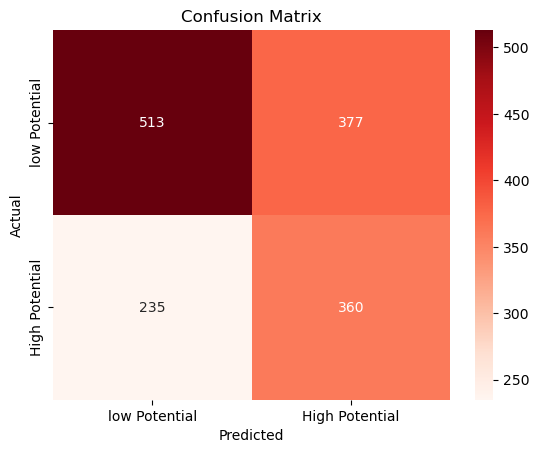

In [45]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['low Potential', 'High Potential'], yticklabels=['low Potential', 'High Potential'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 2) SUPPORT VECTOR MACHINE

In [46]:
X=preprocessed_data.loc[:,['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode']]
y=preprocessed_data.Status

In [48]:
# spliting data for testing and training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)

In [49]:
## Balacing the data using smote
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
smote=SMOTE()#object creation
print(Counter(y_train))# checking count for each class
X_sm,y_sm=smote.fit_resample(X_train,y_train)#applying sampling on target variable
print(Counter(y_sm))# checking count after sampling for  each class

Counter({0: 3601, 1: 2336})
Counter({1: 3601, 0: 3601})


In [50]:
# Support Vector machine Model
from sklearn.svm import SVC
svclassifier = SVC() 
svclassifier.fit(X_sm, y_sm)
y_predict=lr.predict(X_test)#prediction
y_predict#predicted values

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [51]:
# Evalauting the model for testing data
print(classification_report(y_test,y_predict))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       0.69      0.58      0.63       890
           1       0.49      0.61      0.54       595

    accuracy                           0.59      1485
   macro avg       0.59      0.59      0.58      1485
weighted avg       0.61      0.59      0.59      1485



### HYPERPARAMETER TESTING

In [52]:
from sklearn.model_selection import RandomizedSearchCV

# defining parameter range
param_grid = {'C': [1, 5,10,20,50],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf', 'linear']  # Include kernel types
             }
model=SVC()
grid = RandomizedSearchCV(model, param_grid, n_iter=20,refit = True, verbose=0 ,scoring='f1',cv=3)
# fitting the model for grid search
grid.fit(X_sm,y_sm)
# printing best parameter to fit the smote data
print(grid.best_params_)

{'kernel': 'rbf', 'gamma': 1, 'C': 5}


In [53]:
# fitting the data with modelof best parameter
clf=SVC(C=5, gamma=1,kernel='rbf')
clf.fit(X_sm,y_sm)
y_predict=clf.predict(X_test)
# classification report after hyperparameter testing
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       890
           1       0.59      0.68      0.63       595

    accuracy                           0.68      1485
   macro avg       0.67      0.68      0.68      1485
weighted avg       0.69      0.68      0.68      1485



In [54]:
SVM=accuracy_score(y_test,y_predict)
SVM

0.6814814814814815

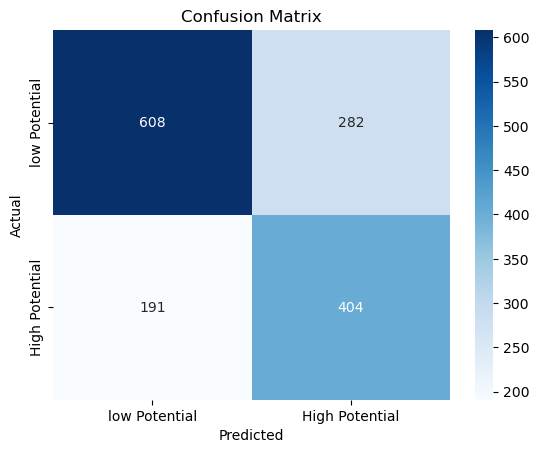

In [55]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['low Potential', 'High Potential'], yticklabels=['low Potential', 'High Potential'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 3) K NEAREST NEIGHBOUR

In [56]:
X=preprocessed_data.loc[:,['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode']]
y=preprocessed_data.Status

In [57]:
# spliting data for testing and training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)

In [58]:
# Balacing the data using smote
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
smote=SMOTE()#object creation
print(Counter(y_train))# checking count for each class
X_sm,y_sm=smote.fit_resample(X_train,y_train)#applying sampling on target variable
print(Counter(y_sm))# checking count after sampling for  each class

Counter({0: 3601, 1: 2336})
Counter({1: 3601, 0: 3601})


In [59]:
#Knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_sm, y_sm)
y_predict = knn.predict(X_test)

In [60]:
# Evalauting the model for testing data
print(classification_report(y_test,y_predict))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       890
           1       0.58      0.58      0.58       595

    accuracy                           0.67      1485
   macro avg       0.65      0.65      0.65      1485
weighted avg       0.66      0.67      0.67      1485



In [61]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_sm, y_sm)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Output the results
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [62]:
# fitting the data with modelof best parameter
knn1=KNeighborsClassifier(metric= 'manhattan', n_neighbors=9, weights= 'distance')
knn1.fit(X_sm,y_sm)
y_predict=knn1.predict(X_test)
# classification report after hyperparameter testing
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       890
           1       0.63      0.55      0.59       595

    accuracy                           0.69      1485
   macro avg       0.68      0.67      0.67      1485
weighted avg       0.69      0.69      0.69      1485



In [63]:
KNN=accuracy_score(y_test,y_predict)
KNN

0.6915824915824916

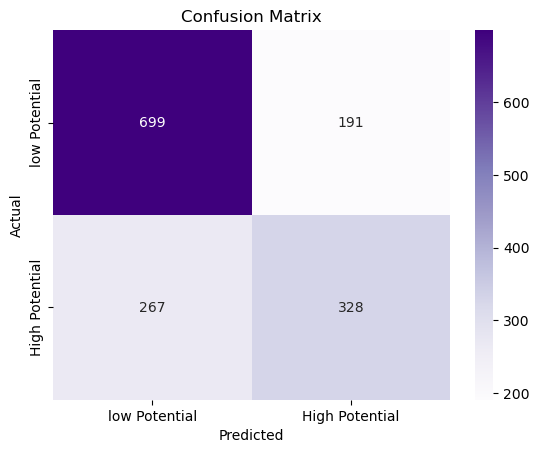

In [64]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['low Potential', 'High Potential'], yticklabels=['low Potential', 'High Potential'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 4) DECISION TREE

In [65]:
X=preprocessed_data.loc[:,['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode']]
y=preprocessed_data.Status

In [66]:
# spliting data for testing and training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)

In [67]:
# Balacing the data using smote
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
smote=SMOTE()#object creation
print(Counter(y_train))# checking count for each class
X_sm,y_sm=smote.fit_resample(X_train,y_train)#applying sampling on target variable
print(Counter(y_sm))# checking count after sampling for  each class

Counter({0: 3601, 1: 2336})
Counter({1: 3601, 0: 3601})


In [68]:
# decision tree algorithm
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree
dt.fit(X_sm,y_sm)#training the model
y_predict=dt.predict(X_test)#prediction
y_predict#predicted values

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [69]:
 #predicting training data to check training performance
X_train_predict=dt.predict(X_sm)
print(X_train_predict)

[1 1 0 ... 1 1 1]


In [70]:
# Evalauting the model for training data
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_sm,X_train_predict))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3601
           1       0.87      0.83      0.85      3601

    accuracy                           0.85      7202
   macro avg       0.86      0.85      0.85      7202
weighted avg       0.86      0.85      0.85      7202



In [71]:
# Evalauting the model for testing data
print(classification_report(y_test,y_predict))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       890
           1       0.60      0.55      0.58       595

    accuracy                           0.67      1485
   macro avg       0.66      0.65      0.66      1485
weighted avg       0.67      0.67      0.67      1485



### HYPERPARAMETER TESTING

In [72]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_sm,y_sm)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'})


In [73]:
#passing best parameter to decision tree
model_2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 5, min_samples_split = 2, splitter = 'random')
model_2.fit(X_sm,y_sm)
y_predict=model_2.predict(X_test)#predicting
y_predict

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [74]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.58      0.67       890
           1       0.55      0.77      0.64       595

    accuracy                           0.65      1485
   macro avg       0.67      0.67      0.65      1485
weighted avg       0.69      0.65      0.65      1485



In [75]:
DT=accuracy_score(y_test,y_predict)
DT

0.6525252525252525

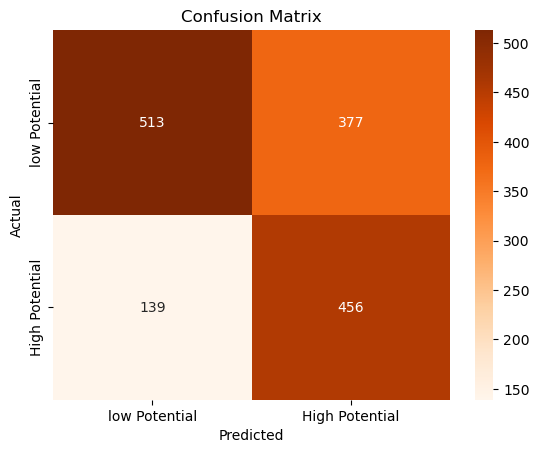

In [76]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['low Potential', 'High Potential'], yticklabels=['low Potential', 'High Potential'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 5)RANDOM FOREST

In [77]:
X=preprocessed_data.loc[:,['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode']]
y=preprocessed_data.Status

In [78]:
# spliting data for testing and training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)

In [79]:
# Balacing the data using smote
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
smote=SMOTE()#object creation
print(Counter(y_train))# checking count for each class
X_sm,y_sm=smote.fit_resample(X_train,y_train)#applying sampling on target variable
print(Counter(y_sm))# checking count after sampling for  each class

Counter({0: 3601, 1: 2336})
Counter({1: 3601, 0: 3601})


In [80]:
# random forest algorithm
from sklearn.ensemble import RandomForestClassifier#importing randomforest
rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest
rf_clf.fit(X_sm,y_sm)#training the data
y_predict=rf_clf.predict(X_test)#prediction
y_predict#predicted values

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [81]:
# Evalauting the model for testing data
print(classification_report(y_test,y_predict))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       890
           1       0.63      0.59      0.61       595

    accuracy                           0.70      1485
   macro avg       0.68      0.68      0.68      1485
weighted avg       0.69      0.70      0.70      1485



### HYPERPARAMETER TESTING

In [82]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(X_sm, y_sm)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters
print(rf_best_params)##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [83]:
# fitting the model with best parameter 
#predicting training data to check training performance
rf_clf2 = RandomForestClassifier(n_estimators= 2000, min_samples_split= 5,min_samples_leaf=1,max_depth= 10,bootstrap= True)#passing best parameter to randomforest
rf_clf2.fit(X_sm, y_sm)#training
y_predict=rf_clf2.predict(X_test)#testing
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       890
           1       0.64      0.70      0.67       595

    accuracy                           0.72      1485
   macro avg       0.71      0.72      0.71      1485
weighted avg       0.73      0.72      0.72      1485



In [84]:
RF=accuracy_score(y_test,y_predict)
RF

0.7198653198653199

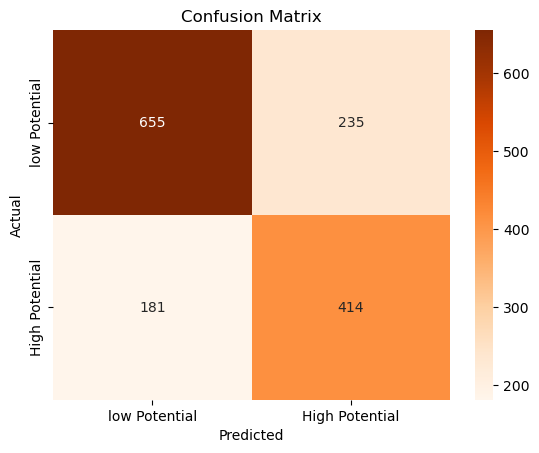

In [85]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['low Potential', 'High Potential'], yticklabels=['low Potential', 'High Potential'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### COMPARISON MATRIX

In [86]:
models = pd.DataFrame([LR,SVM,KNN,DT,RF],
             index=['Logistic Regression','SVM','KNN','DT','Random Forest'],columns=['accuracy'])

models.sort_values('accuracy', ascending=False)


,accuracy
Random Forest,0.719865
KNN,0.691582
SVM,0.681481
DT,0.652525
Logistic Regression,0.587879


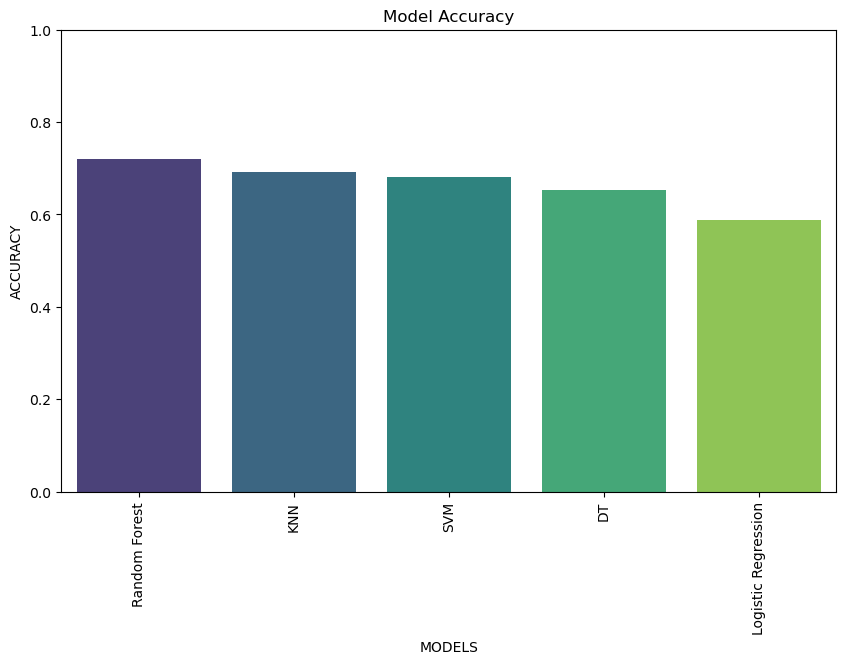

In [87]:
plt.figure(figsize=(10, 6))
models.accuracy.sort_values(ascending=False).values
sns.barplot(x = models.accuracy.sort_values(ascending=False).index, 
            y = models.accuracy.sort_values(ascending=False).values,palette='viridis')
plt.title('Model Accuracy')
plt.xlabel('MODELS')
plt.ylabel('ACCURACY')
plt.xticks(rotation=90)
plt.ylim(0, 1)  
plt.show()

#

### CHALLENGES FACED

-> since every columns are categorical with different unique features it has been very dificult to compress and merge the same category

-> after the merging the categories they are converted to numerical  accoring to the highest value counts

### FINAL MODEL SELECTION

-> We have compared the performance of various algorithms.The data fit with 71.9% accuracy with the Random Forest Classifier.Hence RFC gives balanced accuracy in every measures and is considered as the best model with respect to our needs.Since the dataset was large and with very less features ,we have come to a conclusion that the above score that we obtained is the best.

->BEST FIT MODEL = RANDOM FOREST CLASSIFIER with less true negative